In [1]:
import datetime
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

print(pd.__version__)


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


#################################
# NE PAS RETIRER CETTE LIGNE
#################################
np.random.seed(42)

1.4.1


In [7]:
df = pd.read_csv("data/dataset.csv")
df['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

0.04572072072072072


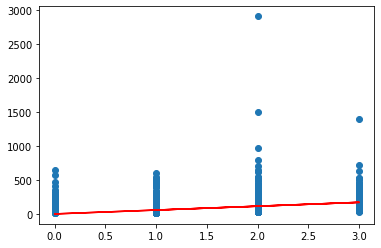

In [2]:
# On lit le dataset
df = pd.read_csv("data/dataset.csv")
cols = ['balcony', 'price']
df = df[cols]


# On filtre les lignes avec des valeurs nulles
df["has_null"] = df.isnull().any(axis=1)
print(df["has_null"].sum() / len(df))
df = df[~df.has_null]


# Train et Test
df_train, df_test = train_test_split(
    df, train_size = 0.9, test_size = 0.1, random_state=42
)

y_train = df_train.pop('price')
X_train = df_train

y_test = df_test.pop('price')
X_test = df_test

# On fit (=apprendre) sur le train
lm = LinearRegression(
    fit_intercept=False # on fit un modèle : Y=a*x (pas d'intercept)
)
lm.fit(X_train, y_train)

# Prédiction sur le test
y_pred_test = lm.predict(X_test)
plt.scatter(X_test['balcony'], y_test)
plt.plot(X_test['balcony'], y_pred_test, color='red')